In [1]:
%pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


In [7]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [9]:
# 이벤트 파일 경로 <- log파일 경로 수정해야함
event_file = "1. kcElectra-1h\events.out.tfevents.1727193109.instance-11296.143025.3"

# 이벤트 파일 읽기
kcElectra = EventAccumulator(event_file)
kcElectra.Reload()

In [10]:
# 이벤트 파일 경로 <- log파일 경로 수정해야함
event_file = "10. raw data\events.out.tfevents.1727268226.instance-11296.249693.0"

# 이벤트 파일 읽기
krElectra = EventAccumulator(event_file)
krElectra.Reload()

In [11]:
# 이벤트 파일 경로 <- log파일 경로 수정해야함
event_file = "16. deberta raw\events.out.tfevents.1727317953.instance-11296.308106.0"

# 이벤트 파일 읽기
deberta = EventAccumulator(event_file)
deberta.Reload()

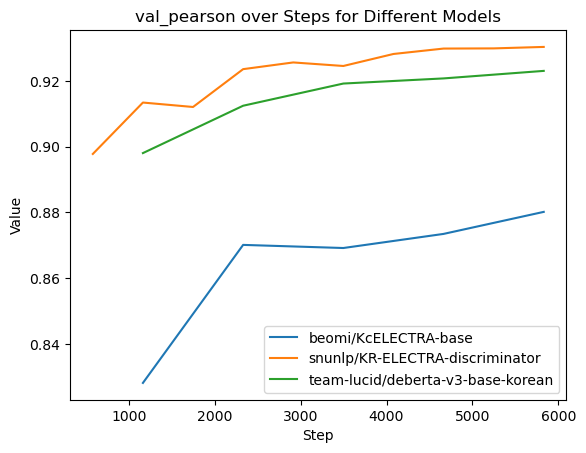

In [21]:
import matplotlib.pyplot as plt

event_accs = {
    "beomi/KcELECTRA-base": kcElectra,
    "snunlp/KR-ELECTRA-discriminator": krElectra,
    "team-lucid/deberta-v3-base-korean": deberta,
}

# 각 모델의 val_pearson 값을 가져오기
for model_name, event_acc in event_accs.items():
    val_pearson_values = event_acc.Scalars("val_pearson")
    steps = [x.step for x in val_pearson_values]
    values = [x.value for x in val_pearson_values]

    # 그래프 그리기
    plt.plot(steps, values, label=f"{model_name}")

plt.xlabel("Step")
plt.ylabel("Value")
plt.title("val_pearson over Steps for Different Models")
plt.legend()
plt.show()

End.